# Checklist
- Data Info
- Data Types
- Missing Values
- Duplicated Values
- Unique Values
- Distributions & Outliers
- Correlations

# Task Details
Every dataset has a story and this set is pulled from IMDb.com of all the Indian movies on the platform.   
Clean this data by removing missing values or adding average values this process will help to manipulate the data to help with your EDA.   
Analyze data and provide some trends.
- Year with best rating
- Does length of movie have any impact with the rating?
- Top 10 movies according to rating per year and overall.
- Number of popular movies released each year.
- Counting the number of votes which movies preformed better in rating per year and overall.
- Any other trends or future prediction you may have
- Which director directed the most movies
- Which actor starred in the movie
- Any other trends you can find

Build a model that predicts the rating of a movie based on 
features like genre, director, and actors.
 You can use regressio 
techniques to tackle this problem.
The goal is to analyze historical movie data and develop a mo el
that accurately estimates the rating given to a movie by user  or
critics.
Movie Rating Prediction project enables you to explor  data
analysis, preprocessing, feature engineering, and machine
learning modeling techniques. It provides insights into the factors
that influence movie ratings and allows you to build a model that
can estimate the ratings of movies accurately.

# Data Source
https://www.kaggle.com/datasets/adrianmcmahon/imdb-india-movies

# Imports

In [1]:
import os
import numpy as np
import pandas as pd

In [2]:
from data_gadgets.cleaning import Cleaner
from data_gadgets.visualization import Visualizer

# Reading Data

In [3]:
path = os.path.join('..', '..', 'data', 'interim', 'data_task2.csv')
data = pd.read_csv(path, encoding='ansi')

In [4]:
data.head()

,name,year,duration,genre,rating,votes,director,actor_1,actor_2,actor_3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),2019.0,109.0,Drama,7.0,8.0,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,2021.0,90.0,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,2019.0,110.0,"Comedy, Romance",4.4,35.0,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,2010.0,105.0,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


# Data Info

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   name      15509 non-null  object 
 1   year      14981 non-null  float64
 2   duration  7240 non-null   float64
 3   genre     13632 non-null  object 
 4   rating    7919 non-null   float64
 5   votes     7920 non-null   float64
 6   director  14984 non-null  object 
 7   actor_1   13892 non-null  object 
 8   actor_2   13125 non-null  object 
 9   actor_3   12365 non-null  object 
dtypes: float64(4), object(6)
memory usage: 1.2+ MB


# Data Types

In [6]:
data['year'] = pd.to_datetime(data.year, format='%Y')

In [7]:
cleaner = Cleaner()
cols = cleaner.separate_data(data, 'rating')
cols

{'target': ['rating'],
 'time': ['year'],
 'category': [],
 'category+': ['name', 'genre', 'director', 'actor_1', 'actor_2', 'actor_3'],
 'continuous': ['duration', 'votes'],
 'continuous+': [],
 'discrete': []}

# Missing Values

In [8]:
data.isnull().sum()

name           0
year         528
duration    8269
genre       1877
rating      7590
votes       7589
director     525
actor_1     1617
actor_2     2384
actor_3     3144
dtype: int64

# Duplicated Values

In [9]:
data.duplicated().sum()

6

# Unique Values

In [10]:
for feature in data.columns:
    print(feature, ':', len(data[feature].unique()))

name : 13838
year : 103
duration : 183
genre : 486
rating : 85
votes : 2035
director : 5939
actor_1 : 4719
actor_2 : 4892
actor_3 : 4821


# Distributions

In [11]:
data.describe()

,year,duration,rating,votes
count,14981,7240.000000,7919.000000,7920.000000
mean,1987-01-05 14:11:03.720712896,128.126519,5.841621,1938.340783
min,1913-01-01 00:00:00,2.000000,1.100000,5.000000
25%,1968-01-01 00:00:00,110.000000,4.900000,16.000000
50%,1991-01-01 00:00:00,131.000000,6.000000,55.000000
75%,2009-01-01 00:00:00,147.000000,6.800000,404.000000
max,2022-01-01 00:00:00,321.000000,10.000000,591417.000000
std,NaN,28.912724,1.381777,11601.694372


In [12]:
visualizer = Visualizer()

## Time

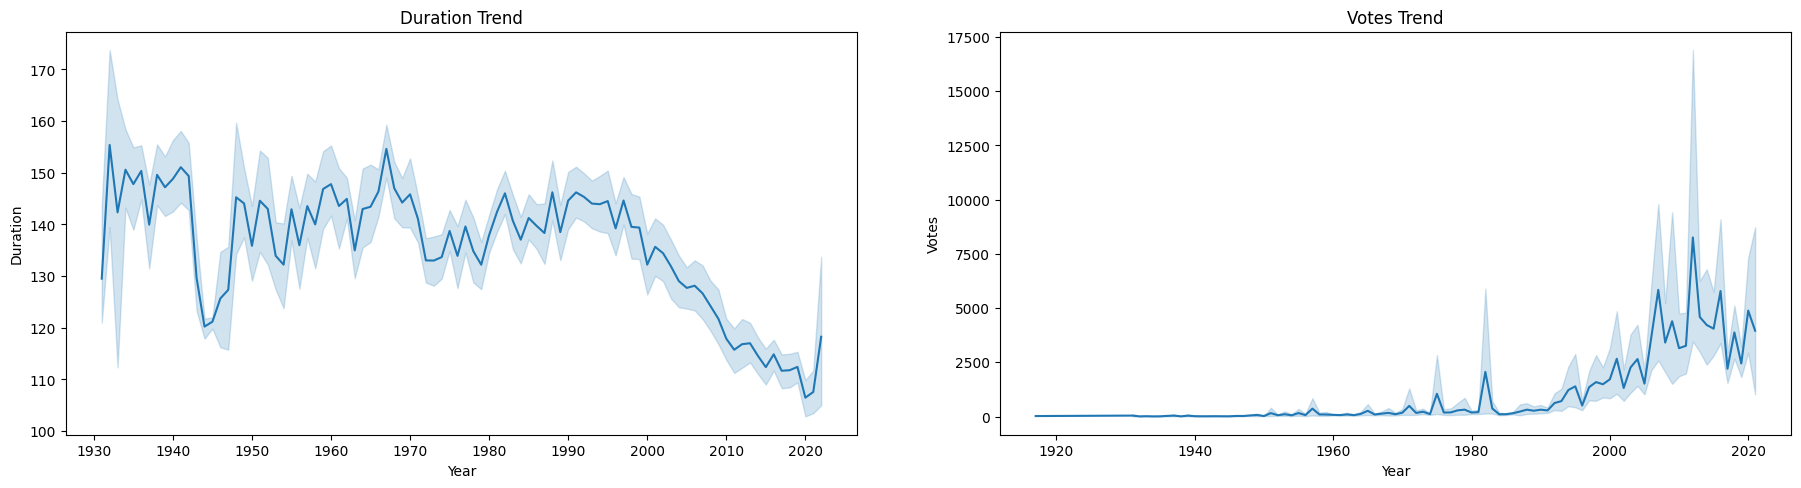

In [13]:
try:
    visualizer.multivariate_subplots(data[cols['continuous']+cols['time']], cols['time'][0], kind='time')
except:
    pass

## Continuous

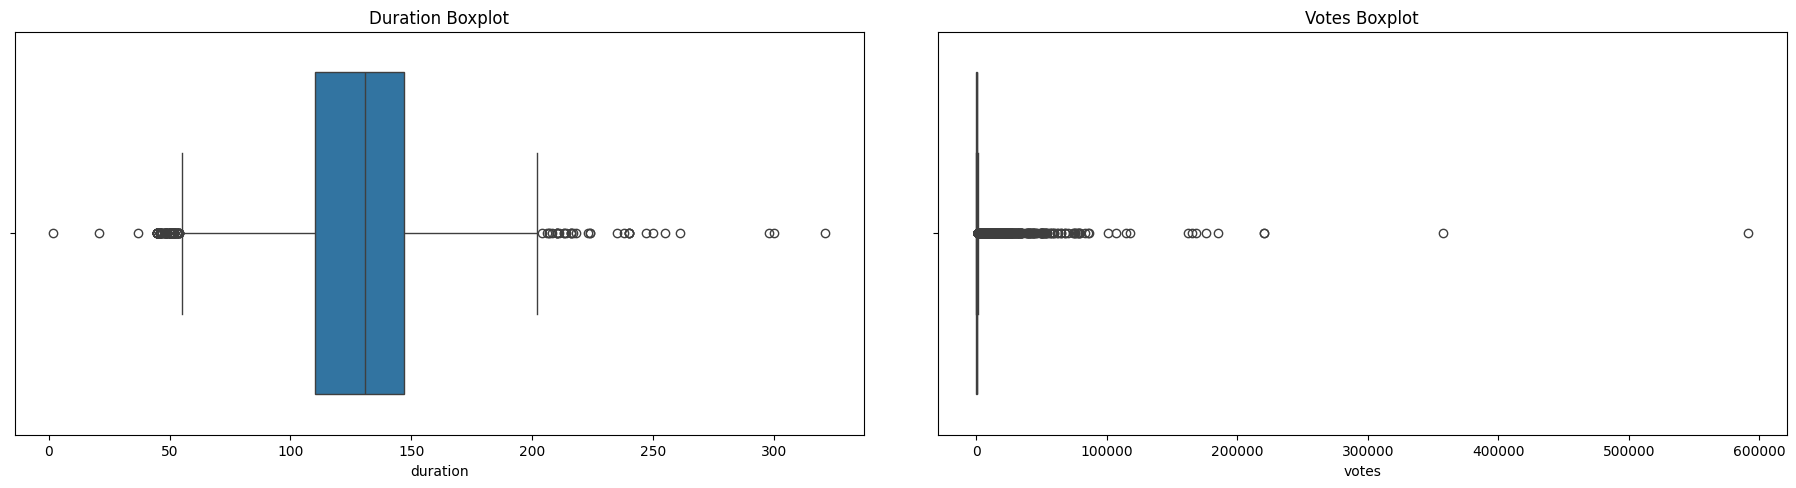

In [14]:
visualizer.univariate_subplots(data[cols['continuous']], 'boxplot', 2, 2)

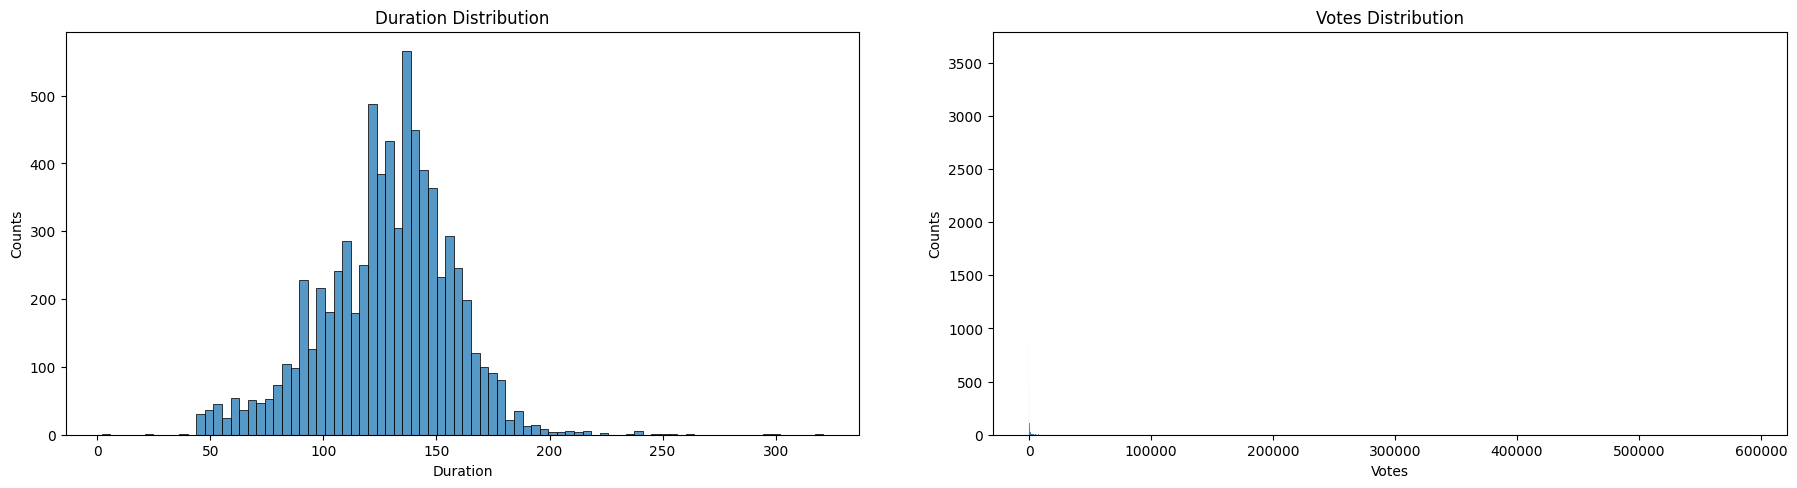

In [15]:
visualizer.univariate_subplots(data[cols['continuous']], 'numerical_counts', 2, 2)

## Discrete

In [16]:
visualizer.univariate_subplots(data[cols['discrete']], 'category_counts', 2, 2)

<Figure size 1920x1080 with 0 Axes>

## Categorical

In [17]:
visualizer.univariate_subplots(data[cols['category']], 'category_counts', 2, 2)

<Figure size 1920x1080 with 0 Axes>

## Target

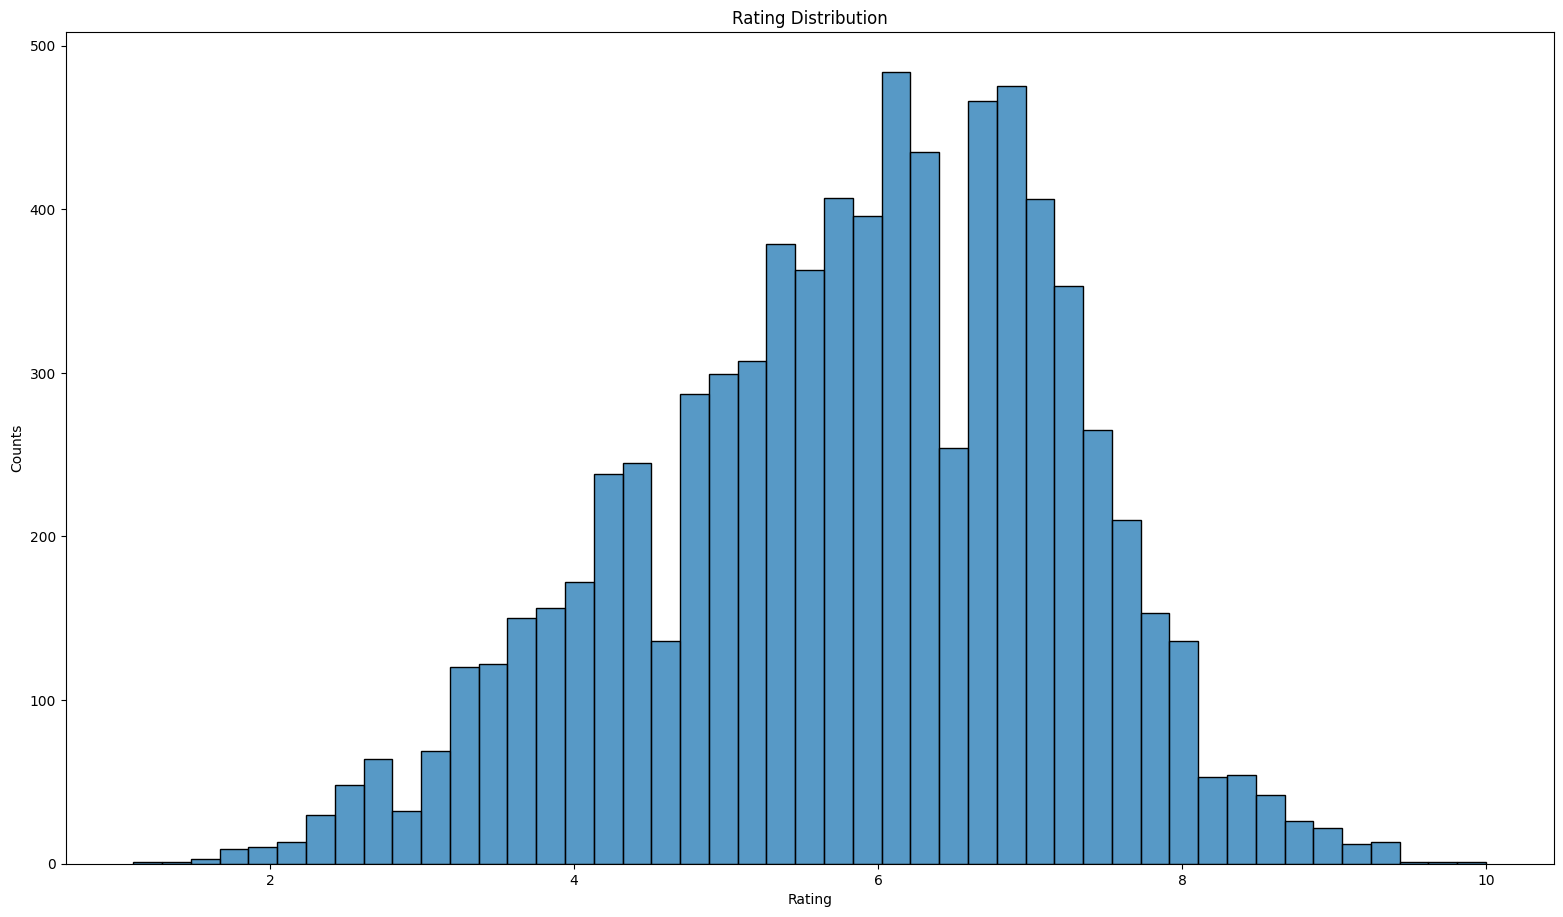

In [18]:
try:
    visualizer.numerical_counts(data, cols['target'][0])
except:
    visualizer.category_counts(data, cols['target'][0])

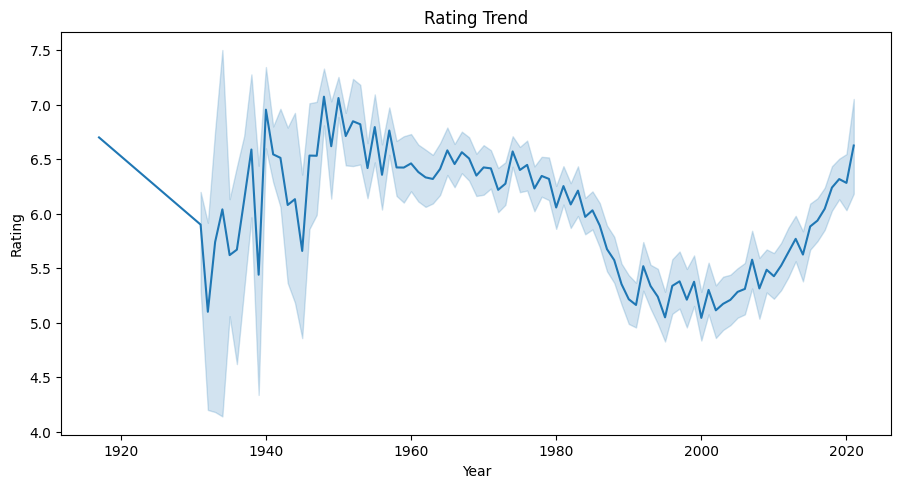

In [19]:
try:
    visualizer.multivariate_subplots(data[cols['time']+cols['target']], cols['time'][0], kind='time')
except:
    pass

# Correlations

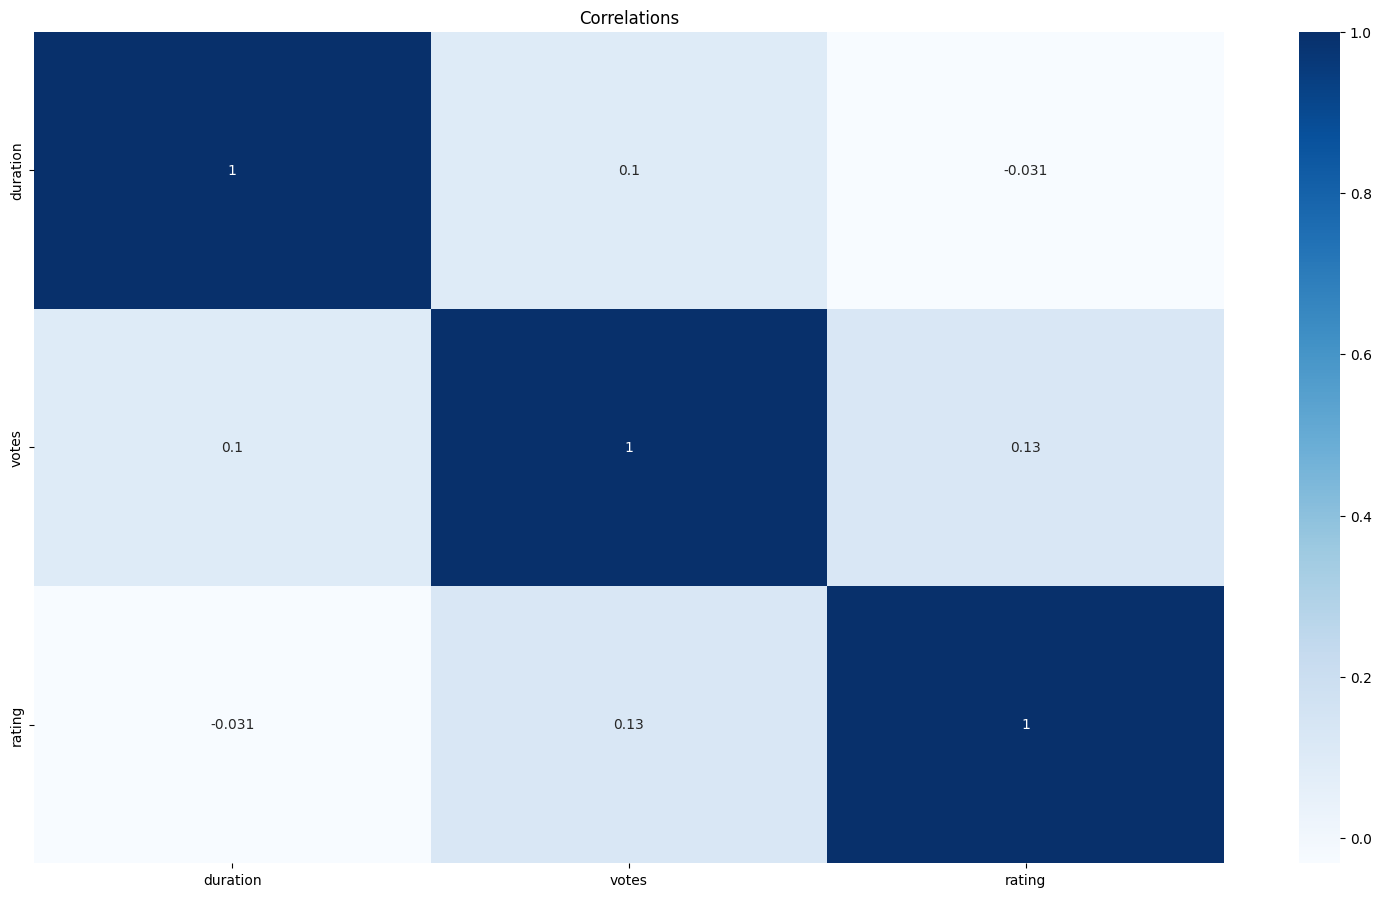

In [20]:
visualizer.correlations(data, cols['continuous']+cols['discrete']+cols['target'])

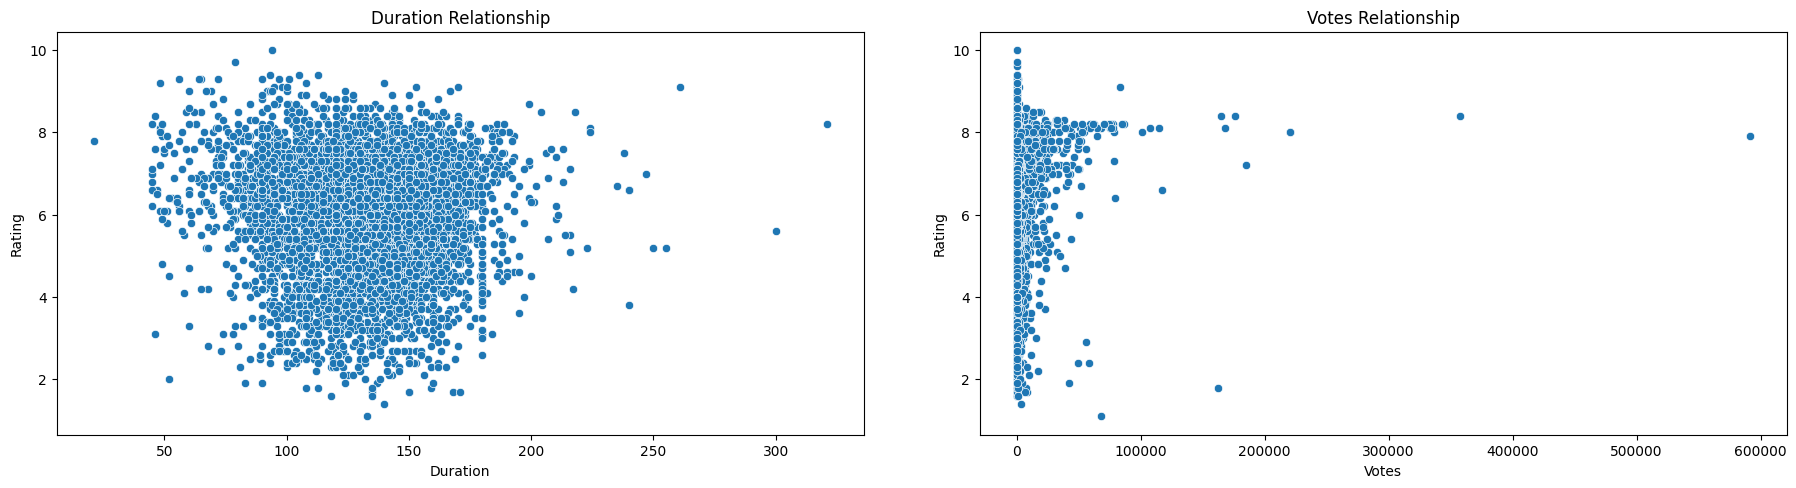

In [21]:
visualizer.multivariate_subplots(data[cols['continuous']+cols['target']], cols['target'][0], 'relationship', max_rows=2, max_cols=2)

# Explainatory Analysis

## Year with best rating

In [22]:
data.nlargest(1, columns='rating')

,name,year,duration,genre,rating,votes,director,actor_1,actor_2,actor_3
8339,Love Qubool Hai,2020-01-01,94.0,"Drama, Romance",10.0,5.0,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari


## Impact of duration on rating
The correlation between rating and duration is almost 0

## Top 10 movies according to Rating

In [23]:
data.nlargest(10, columns='rating')

,name,year,duration,genre,rating,votes,director,actor_1,actor_2,actor_3
8339,Love Qubool Hai,2020-01-01,94.0,"Drama, Romance",10.0,5.0,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021-01-01,79.0,"Music, Romance",9.7,7.0,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020-01-01,NaN,Drama,9.6,48.0,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
5077,Gho Gho Rani,2019-01-01,105.0,"History, Romance",9.4,47.0,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021-01-01,93.0,Drama,9.4,18.0,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
11704,Ram-Path,2017-01-01,NaN,Documentary,9.4,5.0,Ashish Dubey,Ishan Jacob,NaN,NaN
14222,The Reluctant Crime,2020-01-01,113.0,Drama,9.4,16.0,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
1314,Ashok Vatika,2018-01-01,97.0,Drama,9.3,7.0,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
1729,Baikunth,2021-01-01,72.0,Family,9.3,29.0,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
5125,God of gods,2019-01-01,90.0,Documentary,9.3,46.0,Venkatesh Bk,Tejaswini Manogna,Triyug Mantri,Raj Singh Verma


## Top 10 movies according to Votes

In [24]:
data.nlargest(10, columns=['votes'])

,name,year,duration,genre,rating,votes,director,actor_1,actor_2,actor_3
8219,Life of Pi,2012-01-01,127.0,"Adventure, Drama, Fantasy",7.9,591417.0,Ang Lee,Suraj Sharma,Irrfan Khan,Adil Hussain
75,3 Idiots,2009-01-01,170.0,"Comedy, Drama",8.4,357889.0,Rajkumar Hirani,Aamir Khan,Madhavan,Mona Singh
8233,Lion,2016-01-01,118.0,"Biography, Drama",8.0,220526.0,Garth Davis,Dev Patel,Nicole Kidman,Rooney Mara
4848,Gandhi,1982-01-01,191.0,"Biography, Drama, History",8.0,220118.0,Richard Attenborough,Ben Kingsley,John Gielgud,Rohini Hattangadi
14038,The Darjeeling Limited,2007-01-01,91.0,"Adventure, Comedy, Drama",7.2,185127.0,Wes Anderson,Owen Wilson,Adrien Brody,Jason Schwartzman
8228,Like Stars on Earth,2007-01-01,165.0,"Drama, Family",8.4,175810.0,Aamir Khan,Amole Gupte,Darsheel Safary,Aamir Khan
10882,PK,2014-01-01,153.0,"Comedy, Drama, Musical",8.1,168150.0,Rajkumar Hirani,Aamir Khan,Anushka Sharma,Sanjay Dutt
3410,Dangal,2016-01-01,161.0,"Action, Biography, Drama",8.4,165074.0,Nitesh Tiwari,Aamir Khan,Sakshi Tanwar,Fatima Sana Shaikh
11463,Radhe,2021-01-01,135.0,"Action, Crime, Thriller",1.8,162455.0,Prabhu Deva,Salman Khan,Disha Patani,Randeep Hooda
3829,Dil Bechara,2020-01-01,101.0,"Comedy, Drama, Romance",6.6,117377.0,Mukesh Chhabra,Sushant Singh Rajput,Sanjana Sanghi,Sahil Vaid


## Top 10 movies overall

In [25]:
data.nlargest(10, columns=['rating', 'votes'])

,name,year,duration,genre,rating,votes,director,actor_1,actor_2,actor_3
8339,Love Qubool Hai,2020-01-01,94.0,"Drama, Romance",10.0,5.0,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021-01-01,79.0,"Music, Romance",9.7,7.0,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020-01-01,NaN,Drama,9.6,48.0,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
5077,Gho Gho Rani,2019-01-01,105.0,"History, Romance",9.4,47.0,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021-01-01,93.0,Drama,9.4,18.0,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,2020-01-01,113.0,Drama,9.4,16.0,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
11704,Ram-Path,2017-01-01,NaN,Documentary,9.4,5.0,Ashish Dubey,Ishan Jacob,NaN,NaN
12673,Secrets of Sinauli,2021-01-01,56.0,"Documentary, History",9.3,1373.0,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
11843,Refl3ct,2021-01-01,65.0,Sci-Fi,9.3,467.0,Nikhil Mahar,Vijay Mahar,Vijay Mahar,Nikhil Mahar
8344,Love Sorries,2021-01-01,101.0,"Comedy, Drama, Romance",9.3,79.0,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta


## Number of popular movies released each year.

In [26]:
num_popular_movies = {}
for value in data.year.unique():
    num_popular_movies[str(value.year)] = len(data[(data.year == value) & (data.rating > 8)])

In [27]:
num_popular_movies['2019']

31

## Director with highest movies

In [28]:
data.director.value_counts()

director
Jayant Desai        58
Kanti Shah          57
Babubhai Mistry     50
Mahesh Bhatt        48
Master Bhagwan      47
                    ..
Naeem Siddiqui       1
Shadaab Khan         1
Mystelle Brabbee     1
Kunal Shivdasani     1
Kiran Thej           1
Name: count, Length: 5938, dtype: int64

# Conclusion
- Missing Values: Too Many
- Duplicated Values: Few
- Outliers: Some
- Notes
    - Target column (Rating) has many missing values
    - Maybe converting Genre column to only having one value is more useful
    - Actors and Director columns don't give much information
    - This data is not suitable for a model because of following things:
        - Too many missing values
        - Too many unique values of actors and directors
        - Duration and Votes have no correlation with Rating 
        - What's the purpose of the model? To predict the rating in next year?
        - That info is not that useful for an individual movie prediction without an solid evidence
        - It will be like saying any movie that release in 2024 will be top rated
        - Maybe just ignore the low rated directors and just make a model out of high rated directors?
        - Maybe some additional data is required like day, month, geographical information, budget, marketing related stuff etc.